In [6]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import corner
import warnings
from astropy.table import Table
warnings.filterwarnings('ignore')

## generate is_lens to if a galaxy in sample is a lense

In [15]:

with h5py.File('../data/potential_lense_ELCOSMOS.h5', 'r+') as galaxies:
    is_lens = np.zeros(len(galaxies)-1)
    for i in range(len(galaxies)-1):
        id = str(i)
        image_file = f'../data/find_image_ELCOSMOS/{id}_point.dat'
        lines = np.atleast_2d(np.genfromtxt(image_file))
        length = lines.shape[0]
        if length == 1:
            continue
        # print(f'{i} galaxies:', sep=' ')
        ind = 0
        while ind < length:
            num_image = int(lines[ind,0])
            # print(f'{num_image} images:', sep=' ')
            if num_image > 1:
                is_lens[i] = 1
                break
            ind += num_image + 1
    # galaxies.create_dataset('is_lens', data=is_lens)
    del galaxies['is_lens']
    galaxies.create_dataset('is_lens', data=is_lens)
    # galaxies['is_lens'][()] = is_lens


In [16]:
np.sum(is_lens)

436.0

## test if is homogeneous

In [13]:
with h5py.File('../data/potential_lense_ELCOSMOS.h5', 'r') as galaxies:
    # r_circle_ar = np.zeros(len(galaxies)-1)
    x_array = np.array([])
    y_array = np.array([])
    for i in range(len(galaxies)-1):
        id = str(i)
        sample = galaxies[id]
        r_circle = sample.attrs['r_circle']
        num_bg = sample.attrs['num_bg']
        for j in range(num_bg):
            x = sample['x_background'][j]
            y = sample['y_background'][j]
            x = x/r_circle
            y = y/r_circle
            x_array = np.append(x_array, x)
            y_array = np.append(y_array, y)

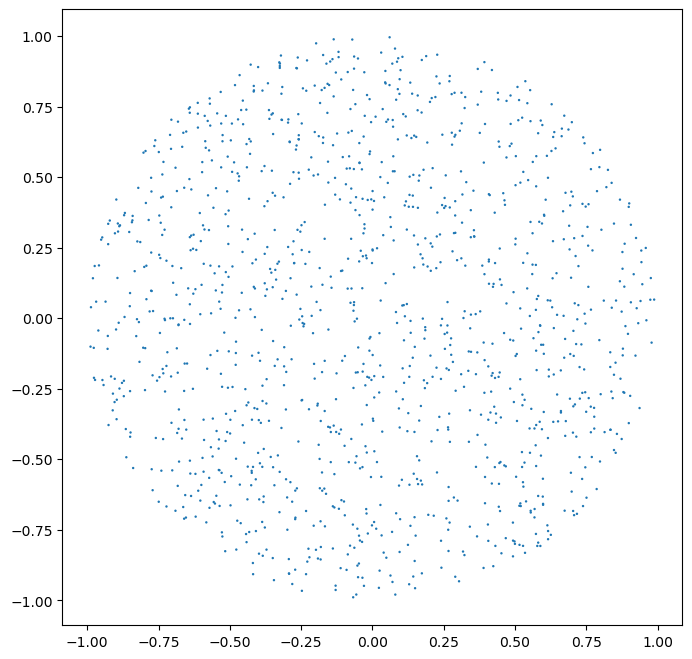

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(x_array, y_array, s=3,edgecolors='none')

## Read sample and store real lens

In [17]:
# with h5py.File('../data/potential_lense_ELCOSMOS.h5', 'r') as galaxies:
#     length = len(galaxies)-1
#     with h5py.File('../data/real_lense_ELCOSMOS.h5', 'w') as lense:
#         is_lens = galaxies['is_lens'][()]
#         id_lens = 0
#         for i in range(length):
#             if is_lens[i] == 0:
#                 continue
#             id = str(i)
#             sample = galaxies[id]
#             l_sample = lense.create_group(str(id_lens))
#             l_sample.attrs['potential_id'] = id
#             l_sample.attrs['alpha_sps'] = sample.attrs['alpha_sps']
#             l_sample.attrs['gamma_DM'] = sample.attrs['gamma_DM']
#             l_sample.attrs['logMh'] = sample.attrs['logMh']
#             l_sample.attrs['logMstar'] = sample.attrs['logMstar']
#             l_sample.attrs['logRe'] = sample.attrs['logRe']
#             l_sample.attrs['logc'] = sample.attrs['logc']
#             l_sample.attrs['num_bg'] = sample.attrs['num_bg']
#             l_sample.attrs['q'] = sample.attrs['q']
#             l_sample.attrs['r_ein'] = sample.attrs['r_ein']
#             l_sample.attrs['rhos'] = sample.attrs['rhos']
#             l_sample.attrs['rs_arcsec'] = sample.attrs['rs']
#             l_sample.attrs['z_foreground'] = sample.attrs['z_foreground']
#             l_sample.attrs['L_background'] = sample['L_background'][()]
#             l_sample.attrs['z_background'] = sample['z_background'][()]
#             l_sample.attrs['x_background'] = sample['x_background'][()]
#             l_sample.attrs['y_background'] = sample['y_background'][()]

#             image_file = f'../data/find_image_ELCOSMOS/{id}_point.dat'
#             images_data = np.atleast_2d(np.genfromtxt(image_file))
#             l_sample.attrs['image_data'] = images_data

#             id_lens += 1


In [13]:
with h5py.File('../data/real_lense_ELCOSMOS.h5', 'r') as lense:
    length = len(lense)
    r_ein = np.zeros(length)
    logMstar = np.zeros(length)
    logRe = np.zeros(length)
    logMh = np.zeros(length)
    logc = np.zeros(length)
    q = np.zeros(length)
    gamma_DM = np.zeros(length)
    z_foreground = np.zeros(length)
    flux_in_fiber = np.zeros(length)
    for i in range(length):
        sample = lense[str(i)]
        r_ein[i] = sample.attrs['r_ein']    
        logMstar[i] = sample.attrs['logMstar']
        logRe[i] = sample.attrs['logRe']
        logMh[i] = sample.attrs['logMh']
        logc[i] = sample.attrs['logc']
        q[i] = sample.attrs['q']
        gamma_DM[i] = sample.attrs['gamma_DM']
        z_foreground[i] = sample.attrs['z_foreground']
        flux_in_fiber[i] = sample.attrs['flux_in_fiber']

In [14]:
ELCOSMOS_lense = Table([r_ein, logMstar, logRe, logMh, logc, q, gamma_DM, z_foreground,flux_in_fiber], names = ('r_ein', 'logMstar', 'logRe', 'logMh', 'logc', 'q', 'gamma_DM', 'z_foreground','flux_in_fiber'))

In [16]:
ELCOSMOS_lense_detectable = ELCOSMOS_lense[ELCOSMOS_lense['flux_in_fiber'] > 5e-17]

In [17]:
ELCOSMOS_lense_detectable

r_ein,logMstar,logRe,logMh,logc,q,gamma_DM,z_foreground,flux_in_fiber
float64,float64,float64,float64,float64,float64,float64,float64,float64
1.907649851993872,11.473384522486137,0.6855767239425052,12.91832919758341,0.8384348329517269,0.49900439435455735,1.3940881511874472,0.14723992621495552,1.3117895440822777e-16
0.549863499951503,11.10173098044742,0.9445514825547656,12.609347686977216,0.8456791150413352,0.7247126190053965,1.137419373936636,0.11076076569746754,6.051466686106202e-16
1.3369813713767118,11.34666983094855,0.9470465689709209,13.020891987499802,0.9420464423020837,0.7986433431792019,1.3316311643989627,0.07863558038530526,1.7475328213973006e-16
1.0378620415054776,11.074384947913877,0.6368532192062076,12.061835506168102,1.1154780678247793,0.7883309573527147,1.4303752072298164,0.11835130199596346,7.930441457207818e-17
1.1775388037144774,11.01299919524953,0.43477923092483306,12.53189201809145,0.8879959464828058,0.652309364153764,1.3952814092998107,0.1056573405529714,6.017048717603705e-17
1.0177158102968298,11.127248949057728,0.7348203947776456,12.912492101992221,0.9100858517452161,0.5531775273177819,1.212117153442097,0.06911918198696053,1.6256995807987182e-15
0.739729325661114,11.073384327349405,0.7689543716800514,12.687603327246558,0.9075051993038328,0.7847681509342765,1.049596051640477,0.13126355339686896,1.0489646891598507e-16
1.1833496762191535,11.147565197125045,0.5753527422132347,12.403161593744446,1.0398972984672619,0.783117879608711,0.763459547792261,0.04748948417366449,3.3844623733986577e-16
1.4614452771490403,11.203540734184807,0.49087839007961187,12.99805166347609,0.8360190596686193,0.4324507801173972,1.2535213092971809,0.12977903084325085,1.5099076632215188e-16


In [3]:
#* parent lenses
with h5py.File('../data/foreground_sample.h5', 'r') as file:
    logMstar_p = np.array(file['logMstar'])
    logMh_p = np.array(file['logMh'])
    logRe_p = np.array(file['logRe'])
    q_p = np.array(file['q'])
    z_p = np.array(file['z'])
    gamma_DM_p = np.array(file['gamma_DM'])
    c_p = np.array(file['c'])
    r_ein_arcsec_p = np.array(file['r_ein_arcsec'])

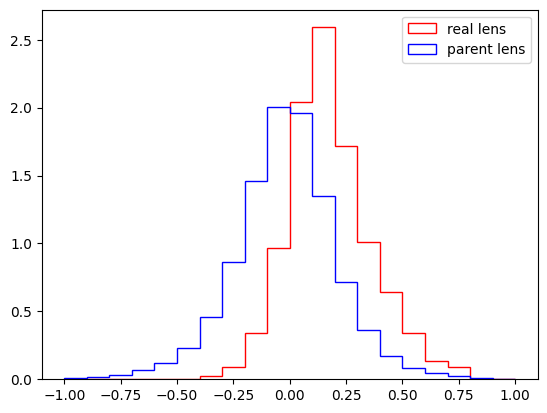

In [4]:
plt.hist(np.log10(r_ein), bins=20, histtype='step', color='r', label='real lens',range = (-1,1),density=True)
plt.hist(np.log10(r_ein_arcsec_p), bins=20, histtype='step', color='b', label='parent lens',range = (-1,1),density=True)
plt.legend()

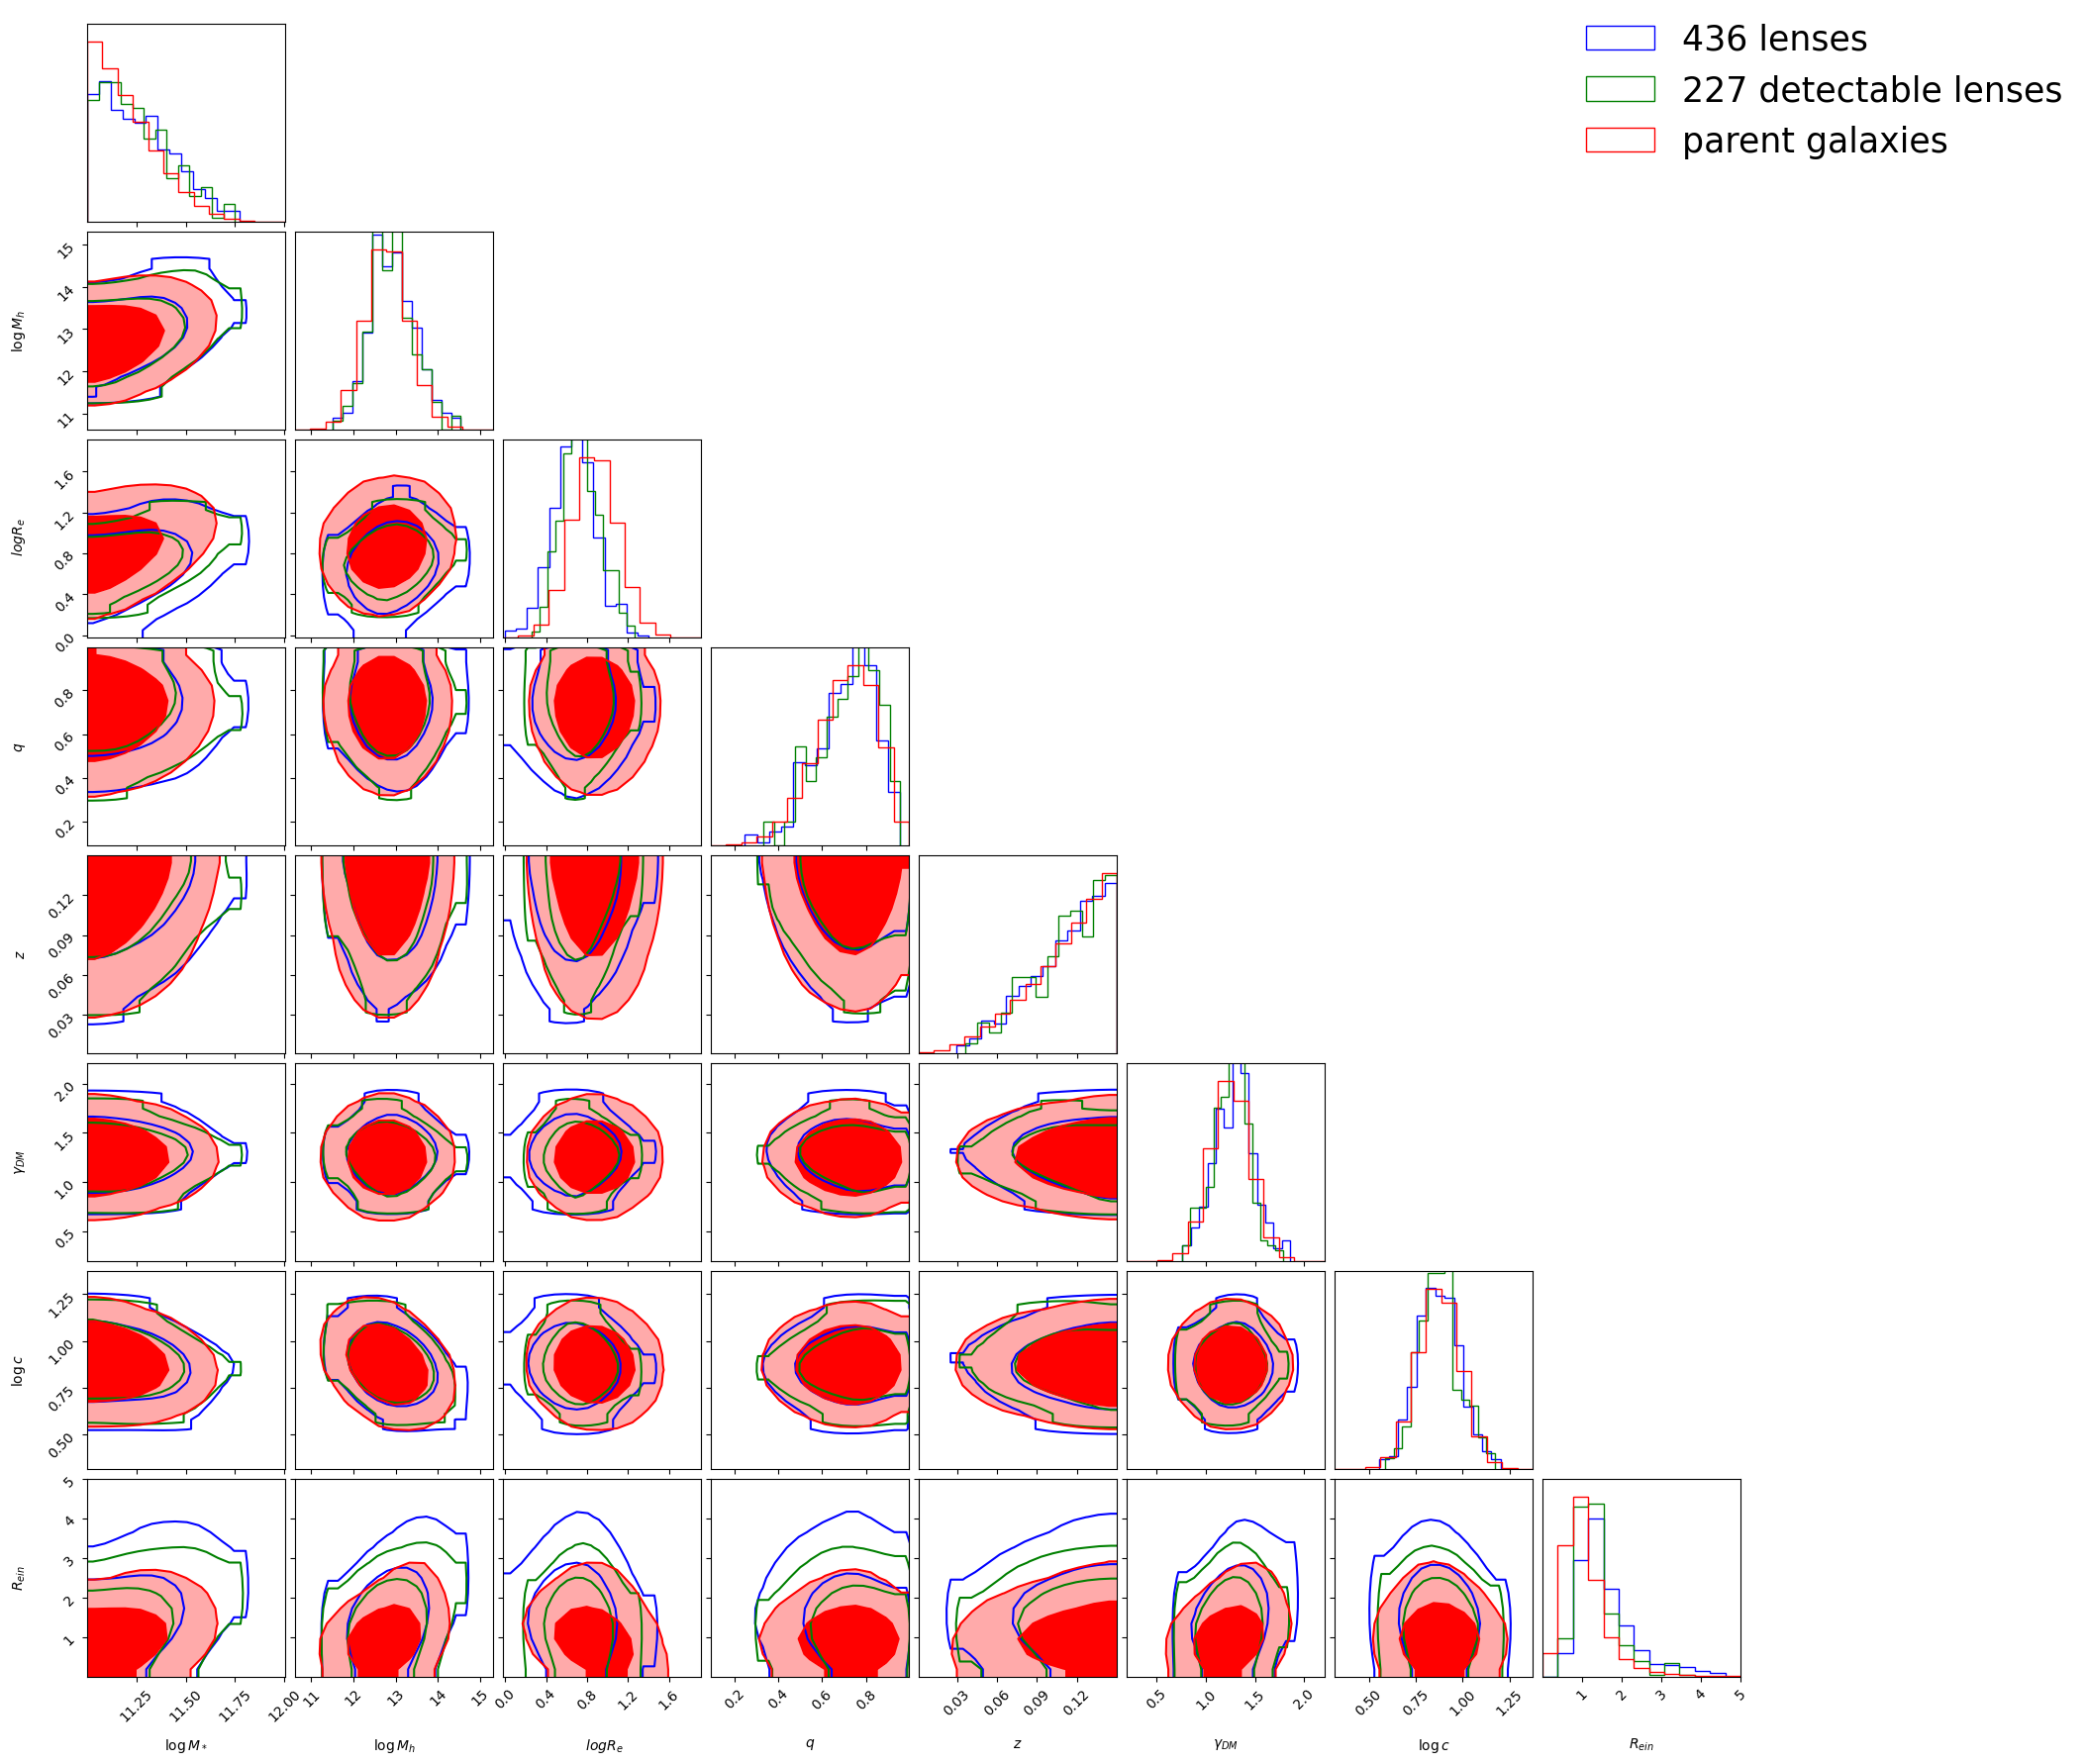

In [47]:
figure = corner.corner(np.array([logMstar,logMh,logRe,q,z_foreground,gamma_DM,logc,r_ein]).T,labels=[r'$\log M_*$',r'$\log M_h$',r'$\ log R_e$',r'$q$',r'$z$',r'$\gamma_{DM}$',r'$\log c$',r'$R_{ein}$'],  plot_datapoints=False, plot_density = 0,fill_contours = 0, levels = (0.68,0.95), hist_kwargs={'density':True, 'label':f'{len(logMstar)} lenses'}, dpi = 1000, color = 'b',  range = [1.,1.,1.,1.,1.,1.,1.,(0,5)], smooth = 2.0,bins = 13)

corner.corner(np.array([ELCOSMOS_lense_detectable['logMstar'], ELCOSMOS_lense_detectable['logMh'], ELCOSMOS_lense_detectable['logRe'], ELCOSMOS_lense_detectable['q'], ELCOSMOS_lense_detectable['z_foreground'], ELCOSMOS_lense_detectable['gamma_DM'], ELCOSMOS_lense_detectable['logc'], ELCOSMOS_lense_detectable['r_ein']]).T, labels=[r'$\log M_*$', r'$\log M_h$', r'$\log R_e$', r'$q$', r'$z$', r'$\gamma_{DM}$', r'$\log c$', r'$R_{ein}$'], plot_datapoints=False, plot_density=0, fill_contours = 0, levels=(0.68, 0.95), hist_kwargs={'density': True, 'label': f'{len(ELCOSMOS_lense_detectable)} detectable lenses'}, dpi=1000, color='g', fig=figure, range=[1., 1., 1., 1., 1., 1., 1., (0, 5)], smooth=2.0,bins = 13)

corner.corner(np.array([logMstar_p,logMh_p,logRe_p,q_p,z_p,gamma_DM_p,c_p,r_ein_arcsec_p]).T,labels=[r'$\log M_*$',r'$\log M_h$',r'$\ log R_e$',r'$q$',r'$z$',r'$\gamma_{DM}$',r'$\log c$',r'$R_{ein}$'], plot_datapoints=False, plot_density = 0, fill_contours = 1,levels = (0.68,0.95),hist_kwargs={'density':True, 'label':'parent galaxies'}, dpi = 1000, color = 'r',  range = [1.,1.,1.,1.,1.,1.,1.,(0,5)],smooth=1.0,bins = 13,fig = figure)
# ax = np.array(figure.get_axes()).reshape(8,8)

plt.legend(frameon = 0, loc=(0.15,7.6), fontsize = 25)
plt.show()